In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar, fsolve
from scipy.stats import rv_continuous

### Probability density function
Consider $f(x) = x^2$ in the range [0, 5]. 

We first find the normalization factor:  $A\int_0^5 x^2 dx = 1 \longrightarrow A = \frac{3}{125}$

We define the `xSquared` function and plot it over the range (using the appropriate normalization factor)

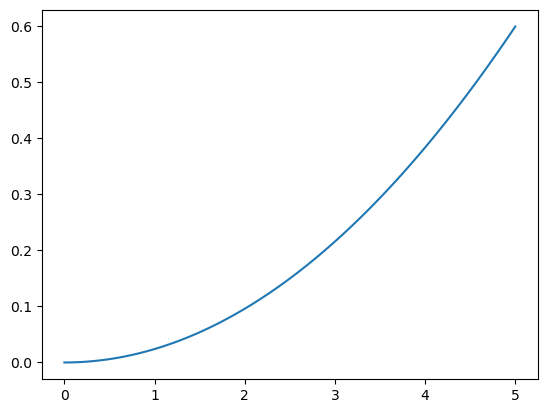

In [4]:
def xSquared(x, a=1):
  return a * x**2

xs = np.linspace(0, 5, 100)
plt.plot(xs, xSquared(xs, a=(3/125)))

### Cumilative Distribution Function
We need to set the proper ranges for the CDF at the boundaries of our range (0 and 5)

$CDF = 0 (x < 0)$

$CDF = 1 (x > 5)$

$CDF = \frac{x^3}{125}$

0.005832

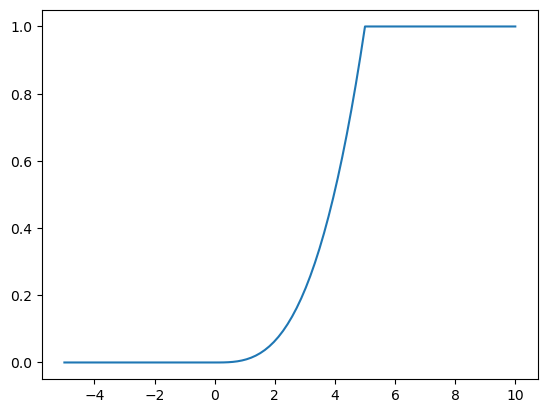

In [43]:
def xSquaredCDF(x, r=0):
  x = np.array(x)  # Ensure x is a NumPy array
  return np.where(
      x < 0, 0, 
      np.where(x > 5, 1, (x**3) / 125)
  ) - r
  
xs = np.linspace(-5, 10, 100)
plt.plot(xs, xSquaredCDF(xs))

xSquaredCDF(0.9)

### Creating the random number generator
Using the fact that $CDF(x) = r$ where $r$ is in [0,1].

We solve analytically for x: $\frac{x^3}{125} = r \longrightarrow x = (125r)^{-\frac13}$

In [123]:
def randGen(num=1):
  # Random number between 0 and 1
  r = np.random.rand(num)
  # construct the function to solve
  expr = lambda x: xSquaredCDF(x, r=r)
  # Solve for x and return
  return (125*r) ** (1. / 3)

We then plot the distribution of an array of random numbers generated by our function

(array([ 16.,  20.,  30.,  52.,  69.,  98., 116., 154., 179., 266.]),
 array([0.67182684, 1.10452735, 1.53722785, 1.96992836, 2.40262887,
        2.83532938, 3.26802988, 3.70073039, 4.1334309 , 4.5661314 ,
        4.99883191]),
 <BarContainer object of 10 artists>)

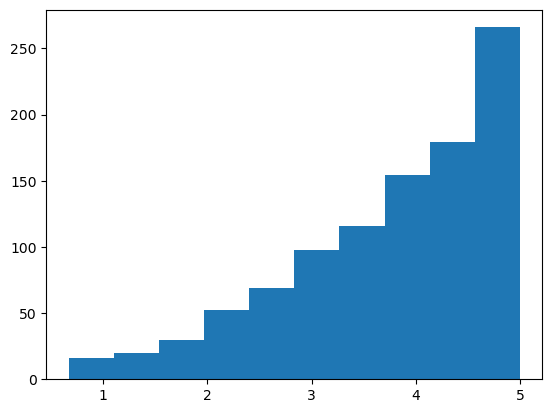

In [124]:
plt.hist(randGen(1000))